In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 

In [2]:
#column name lists assignment
movies_col = ['MovieID','Title','Genres']
ratings_col = ['UserID','MovieID','Rating','Timestamp']
users_col = ['UserID','Gender','Age','Occupation','Zip-code']

In [3]:
#data frame creation
movies_df = pd.read_csv('movies.dat', header=None, delimiter='::', 
                         engine='python', names=movies_col)
movies_df.dropna(inplace=True)
print(movies_df.head())
ratings_df = pd.read_csv('ratings.dat', header=None, delimiter='::', 
                          engine='python', names=ratings_col)
ratings_df.dropna(inplace=True)
print(ratings_df.head())
users_df = pd.read_csv('users.dat', header=None, delimiter='::',
                        engine='python', names=users_col)
users_df.dropna(inplace=True)
print(users_df.head())


   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


In [4]:
#merging above dataframes into one dataframe
master_data = ratings_df.merge(movies_df, on = ['MovieID'], how = 'outer')

master_data = master_data.merge(users_df, on = ['UserID'], how = 'outer')
master_data.dropna(inplace=True)
master_data.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1.0,1193,5.0,978300760.0,One Flew Over the Cuckoo's Nest (1975),Drama,F,1.0,10.0,48067
1,1.0,661,3.0,978302109.0,James and the Giant Peach (1996),Animation|Children's|Musical,F,1.0,10.0,48067
2,1.0,914,3.0,978301968.0,My Fair Lady (1964),Musical|Romance,F,1.0,10.0,48067
3,1.0,3408,4.0,978300275.0,Erin Brockovich (2000),Drama,F,1.0,10.0,48067
4,1.0,2355,5.0,978824291.0,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1.0,10.0,48067


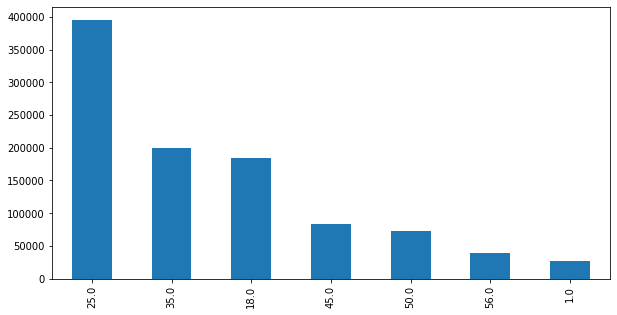

Text(0.5, 0, 'Age')

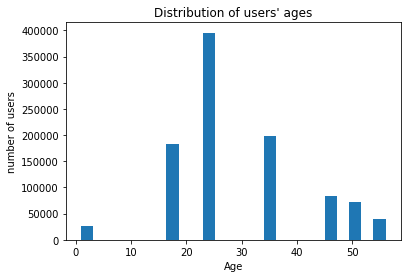

In [5]:
#Exploratory Data Analysis

#User Age distribution using histogram

master_data['Age'].value_counts().plot(kind='bar',figsize=(10,5))
plt.show()

master_data.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('number of users')
plt.xlabel('Age')

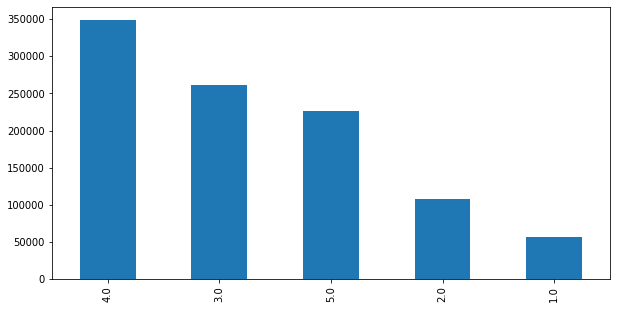

In [6]:
#Visualize  rating by users
master_data['Rating'].value_counts().plot(kind='bar',figsize=(10,5))
plt.show()

master_data.loc[master_data['Age'] ==1, 'Age Group'] = 'Under 18'
master_data.loc[master_data['Age'] ==18, 'Age Group'] = '18-24'
master_data.loc[master_data['Age'] ==25, 'Age Group'] = '25-34'
master_data.loc[master_data['Age']==35, 'Age Group'] = '35-44'
master_data.loc[master_data['Age'] ==45, 'Age Group'] = '45-49'
master_data.loc[master_data['Age'] ==50, 'Age Group'] = '50-55'
master_data.loc[master_data['Age']==56, 'Age Group'] = '56+'

In [7]:
#User rating of the movie 'Toy story'
user_rating_toy_story = master_data[master_data.Title.str.contains('Toy Story')][['UserID','Title',
            'Rating']].groupby(['Title'])['Rating'].agg(['sum','count']).reset_index()
print(user_rating_toy_story)
user_rating_toy_story['Overall_Rating'] = (user_rating_toy_story['sum']/user_rating_toy_story['count']).round()
user_rating_toy_story.drop(columns='sum',axis=1,inplace=True)
user_rating_toy_story.rename(columns = {'count':'Number_of_votes'}, inplace=True)
print(user_rating_toy_story)


                Title     sum  count
0    Toy Story (1995)  8613.0   2077
1  Toy Story 2 (1999)  6687.0   1585
                Title  Number_of_votes  Overall_Rating
0    Toy Story (1995)             2077             4.0
1  Toy Story 2 (1999)             1585             4.0


In [8]:
#Top 25 movies by viewership rating
group_rating = master_data[['Title','Rating']].groupby('Title')['Rating'].agg(['sum','count']).reset_index()
group_rating.rename(columns = {'count':'Number_of_votes','sum':'Total_rating'}, inplace = True)
group_rating['Overall_rating'] = (group_rating['Total_rating']/group_rating['Number_of_votes']).round()
print(group_rating.head())
top_25_movies = group_rating.sort_values(by=['Overall_rating','Number_of_votes'], 
                         ascending = False)[['Title','Overall_rating']].head(25).reset_index()
top_25_movies.drop(columns='index',inplace=True,axis=1)
print(top_25_movies)


                           Title  Total_rating  Number_of_votes  \
0         $1,000,000 Duck (1971)         112.0               37   
1           'Night Mother (1986)         236.0               70   
2      'Til There Was You (1997)         140.0               52   
3             'burbs, The (1989)         882.0              303   
4  ...And Justice for All (1979)         739.0              199   

   Overall_rating  
0             3.0  
1             3.0  
2             3.0  
3             3.0  
4             4.0  
                                                Title  Overall_rating
0                             Schindler's List (1993)             5.0
1                    Shawshank Redemption, The (1994)             5.0
2                               Godfather, The (1972)             5.0
3                          Usual Suspects, The (1995)             5.0
4                          Wrong Trousers, The (1993)             5.0
5                               Close Shave, A (1995)    

In [9]:
#ratings for all the movies reviewed by for a particular user of user id = 2696
movie_list = master_data[master_data['UserID']==2696]['MovieID'].tolist()

movies_for_2696 = master_data[master_data['MovieID'].isin(movie_list)][['Title','Rating']].groupby('Title')['Rating'].agg(['sum','count']).reset_index()
movies_for_2696['Overall_rating'] = (movies_for_2696['sum']/movies_for_2696['count']).round()
movies_for_2696.drop(columns=['sum','count'],inplace=True)
print(movies_for_2696)

                                             Title  Overall_rating
0                        Back to the Future (1985)             4.0
1                            Basic Instinct (1992)             4.0
2                               Client, The (1994)             3.0
3                                  Cop Land (1997)             3.0
4                     Devil's Advocate, The (1997)             3.0
5                E.T. the Extra-Terrestrial (1982)             4.0
6                                 Game, The (1997)             4.0
7           I Know What You Did Last Summer (1997)             3.0
8     I Still Know What You Did Last Summer (1998)             2.0
9                                       JFK (1991)             4.0
10                        L.A. Confidential (1997)             4.0
11                              Lake Placid (1999)             3.0
12                                Lone Star (1996)             4.0
13  Midnight in the Garden of Good and Evil (1997)            

   UserID  MovieID  Rating Gender  Age  Occupation Age Group
0     1.0     1193     5.0      F  1.0        10.0  Under 18
1     1.0      661     3.0      F  1.0        10.0  Under 18
2     1.0      914     3.0      F  1.0        10.0  Under 18
3     1.0     3408     4.0      F  1.0        10.0  Under 18
4     1.0     2355     5.0      F  1.0        10.0  Under 18
Heat Map
Co-relation Plot


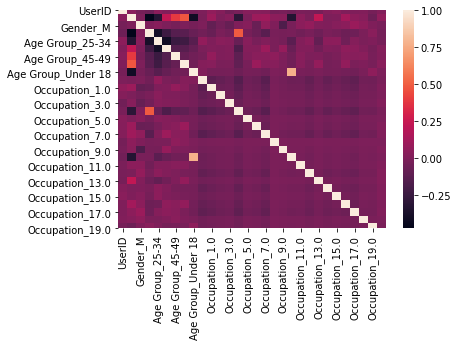

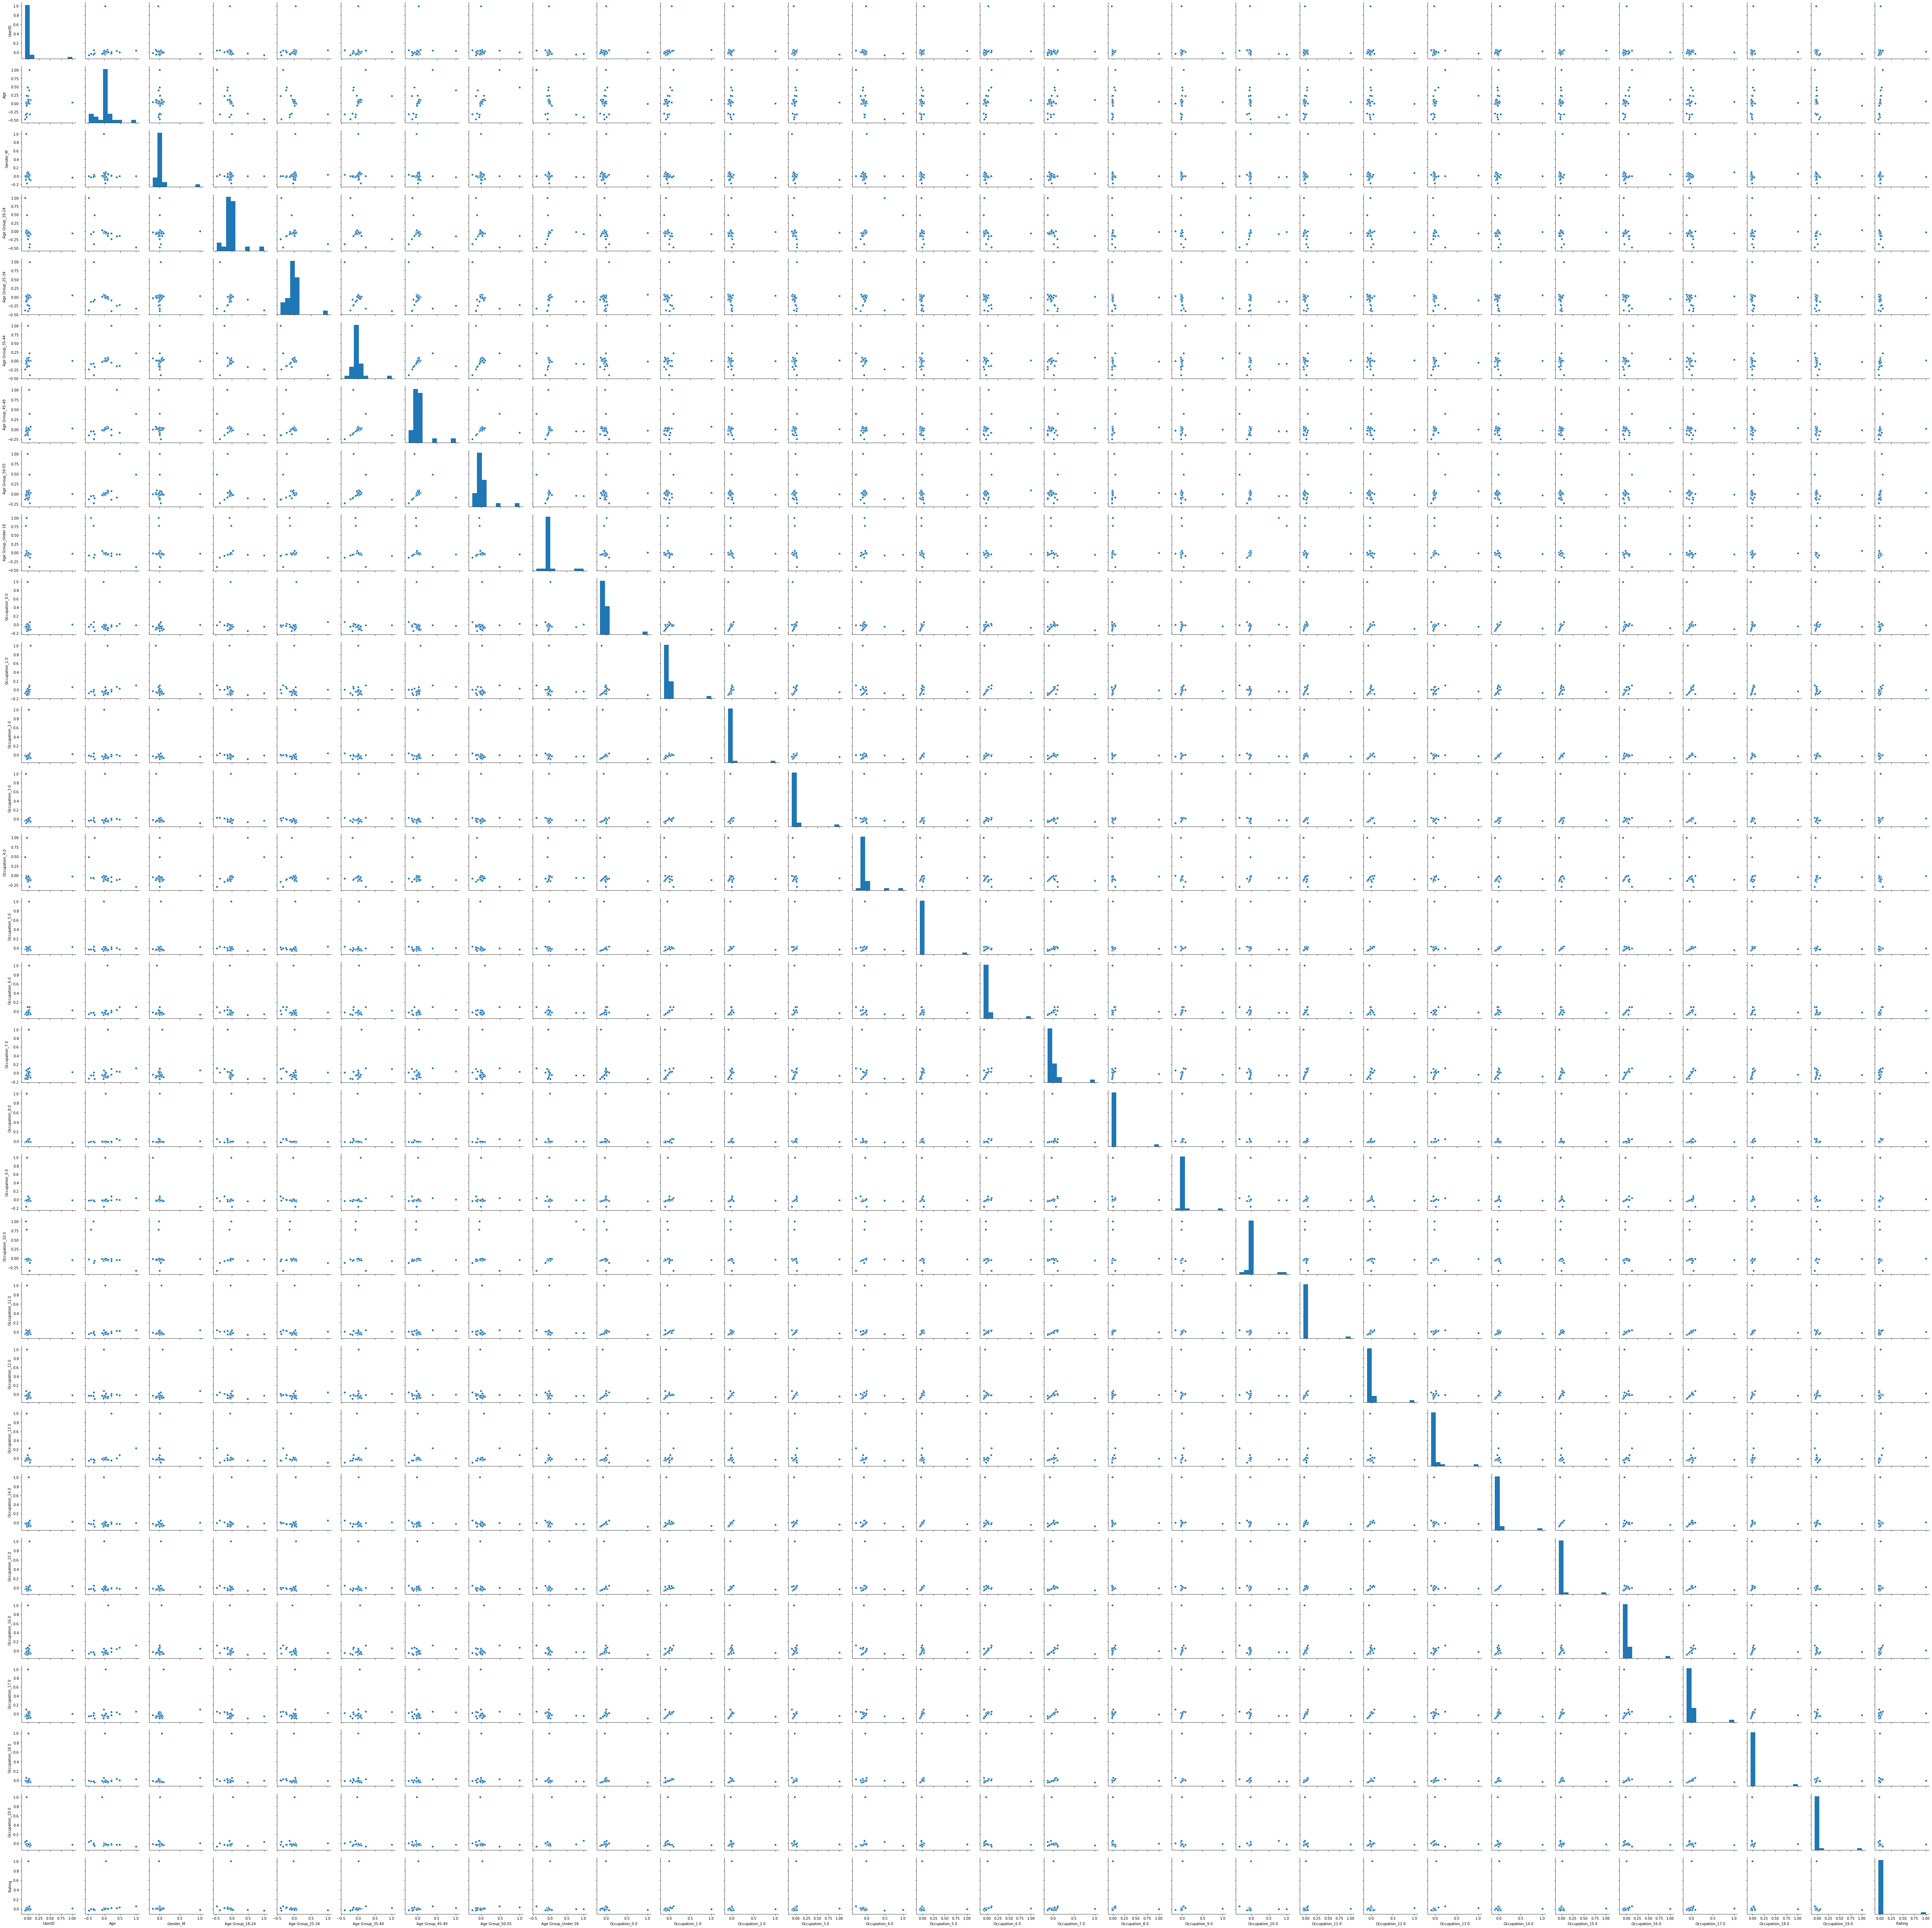

In [10]:
df = master_data.drop(columns=['Title','Zip-code','Timestamp','Genres'])

print(df.head())

df.Occupation.value_counts()
df.set_index('MovieID', inplace = True)


X = df.drop(columns=['Rating'])
Y = df['Rating']

x1 = pd.get_dummies(data=X)
x2 = pd.get_dummies(X['Occupation'], prefix = 'Occupation')

X = pd.concat([x1,x2], axis=1)

X.columns
X.drop(columns = ['Occupation','Gender_F','Age Group_56+','Occupation_20.0'],
       axis = 1, inplace=True)

X.head()

XY = pd.concat([X,Y], axis=1)
XY.head()
XY.corr()
print("Heat Map")
sns.heatmap(XY.corr())
print("Co-relation Plot")
sns.pairplot(XY.corr())

X = X.values
Y = Y.values
train, test, train_labels, test_labels = train_test_split(X,Y,test_size=0.33,random_state=42)

In [11]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = accuracy_score(test_labels, Y_pred)*100
print("Decision Tree Accuracy {}".format(acc_decision_tree)) #35 accuracy score

#applying random forest classifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
acc_random_forest = accuracy_score(test_labels, Y_pred)*100
print("Random Forest Accuracy {}".format(acc_random_forest)) #36 accuracy score

Decision Tree Accuracy 39.55869833277285
Random Forest Accuracy 39.54960932411102
